# colab을 이용한 기계학습 실습

🎯 학습 목표 : colab 환경에서 기계 학습 코드를 실행하고 결과를 확인할 수 있다.

- 실습 재료
    | 항목 | 상세 |
    | ---- | ---- |
    | 🗂️ 데이터 | AI-HUB의 치매 고위험군 웨어러블 라이프로그 중 샘플 데이터 |
    | 🤖 기계 학습 알고리즘 | 결정 트리 (Decision Tree) |
    | 🏗️ 기계 학습 프레임워크 | Scikit-learn |
    | 🐍 프로그래밍 언어 | Python |
    | 👩‍💻 프로그래밍 환경 | Colab |


- colab에서 코드 실행 방법은 다음 그림을 참조해주시기 바랍니다.
    ![](https://i.imgur.com/0GoFr7q.png)

<!-- ## 1. Colab이란?

- colab은 구글에서 제공하는 온라인 기계 학습 환경 입니다.

![](https://post-phinf.pstatic.net/MjAxOTEwMTVfMTE4/MDAxNTcxMTA3ODE4NTcy.KmzXuRSS3HWe4qnBR7esUkTOCPELkbi6fD0khAX8i8kg.9KgltPv7JsznlhiQVmmCxwVFBqLUI03VZaAwFwxUfHkg.JPEG/29.JPG?type=w1200)
*(그림 출처 : [네이버 블로그](https://post.naver.com/viewer/postView.nhn?volumeNo=26447765))*

- 기계 학습 코드를 작성하고, 실행할 수 있습니다.
  - 기계 학습 코드를 작성하기 위해서 필요한 것은 웹 브라우저뿐 입니다! 지금 여러분들이 보고 계시듯이 말이죠.
  - 실행은 구글의 데이터 센터에서 실행됩니다. -->

### 1. 필요 라이브러리 및 함수 추가

원할한 실습을 위해 필요한 데이터 변환 및 분석에 사용되는 함수를 미리 만들어 두었습니다. 😉

- *(참고) 데이터 변환 및 사용되는 함수 코드는 https://github.com/taeminlee/ai_practice 에서 모두 확인 가능합니다.*

아래의 코드 셀을 실행해주시기 바랍니다.

In [1]:
# 이번 실습에 사용하는 데이터 및 함수를 다운로드 받습니다.
## 참고 : 느낌표(!)로 시작하는 코드는 python이 아닌, linux 운영체제 명령어로 실행됩니다.
!rm ai_practice -rf
!git clone https://github.com/taeminlee/ai_practice
# 데이터를 불러옵니다.
## 참고 : 해당 데이터 처리 코드는 https://github.com/taeminlee/ai_practice/data_util.py 에 기록되어 있습니다.
from ai_practice.data_util import data, Q_dict, X, Y, train_X, train_Y, test_X, test_Y
# 분석 함수를 불러옵니다.
## 참고 : 해당 함수 코드는 https://github.com/taeminlee/ai_practice/model_util.py 에 기록되어 있습니다.
from ai_practice.model_util import get_graph, plot_feature_importance, get_feature_importance_table
# 기계 학습 라이브러리를 불러옵니다.
from sklearn.tree import DecisionTreeClassifier

Cloning into 'ai_practice'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 19 (delta 6), reused 15 (delta 4), pack-reused 0
Unpacking objects: 100% (19/19), 5.12 KiB | 748.00 KiB/s, done.


### 2. 데이터 살펴보기

이번 실습에서 사용되는 데이터는 [AI-HUB의 치매 고위험군 웨어러블 라이프로그 데이터 집합](https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=226) 중 인지기능 데이터의 샘플 자료를 이용합니다.

실습 데이터 집합에 대한 명세는 다음과 같습니다.

- 데이터 개수 : 16개
- 주요 항목
  - DIAG_NM : 진단명
    - (CN : `정상`, MCI : `경도인지장애`, Dem : `치매`)
  - Q01 ~ Q19 : 부분 질문을 포함하여, 총 30개의 질문
    - (정답 : `2`, 오답 : `1`)
  - TOTAL : 총점
    - (0 ~ 30)

In [2]:
# 데이터를 살펴보기 위해 이 코드 블록을 실행시켜 주십시오.
data

,SAMPLE_EMAIL,DIAG_SEQ,DIAG_NM,DOCTOR_NM,MMSE_NUM,MMSE_KIND,Q01,Q02,Q03,Q04,...,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL
0,nia+041@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,29
1,nia+118@rowan.kr,4,CN,-,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
2,nia+141@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,30
3,nia+279@rowan.kr,1,MCI,-,1,2,1,2,2,1,...,2,2,1,1,2,2,1,2,2,17
4,nia+252@rowan.kr,3,MCI,-,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,27
5,nia+106@rowan.kr,4,MCI,-,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28
6,nia+343@rowan.kr,4,CN,-,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,28
7,nia+188@rowan.kr,3,CN,-,3,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,27
8,nia+144@rowan.kr,2,MCI,-,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,29
9,nia+088@rowan.kr,4,MCI,-,4,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,28


30개의 문항에 대한 상세 정보는 다음과 같습니다.

In [3]:
# 문항 확인을 위해 이 코드 블록을 실행시켜 주십시오.
Q_dict

{'Q01': '올해가 몇 년 이지요?',
 'Q02': '지금은 어떤 계절이지요?',
 'Q03': '오늘이 며칠입니까?',
 'Q04': '오늘이 무슨 요일인가요?',
 'Q05': '오늘이 몇 월 입니까?',
 'Q06': '지금 우리가 있는 이곳은 어느 나라입니까?',
 'Q07': '우리는 지금 무슨 시(도)에 있습니까?',
 'Q08': '지금 우리가 있는 여기는 어디입니까? (지금 계시는 이곳을 무엇이라고 부릅니까?)',
 'Q09': '지금 우리가 있는 이곳은 몇 층 입니까?',
 'Q10': '여기에서는 어떤 일을 하나요?',
 'Q11_1': '자, 잘 들으세요. 제가 지금부터 물건 이름 세개를 불러 드리겠습니다. 세 가지를 다 들으시고나서 그대로 외워서 저에게 말씀해주세요. 비행기 (1초간 멈춤)',
 'Q11_2': '외워서 저에게 말씀해주세요. 연필(1초간 멈춤)',
 'Q11_3': '외워서 저에게 말씀해주세요. 소나무',
 'Q12_1': '100에서 7을 빼면 얼마가 됩니까?',
 'Q12_2': '거기에서 7을 빼면 얼마가 됩니까?',
 'Q12_3': '거기에서 7을 빼면 얼마가 됩니까?',
 'Q12_4': '거기에서 7을 빼면 얼마가 됩니까?',
 'Q12_5': '거기에서 7을 빼면 얼마가 됩니까?',
 'Q12_TOTAL': 'Q12 부분합',
 'Q13_1': '좀 전에 제가 외우고 계시라고 했던 물건 이름 세 가지 기억나세요? (비행기)',
 'Q13_2': '좀 전에 제가 외우고 계시라고 했던 물건 이름 세 가지 기억나세요? (연필)',
 'Q13_3': '좀 전에 제가 외우고 계시라고 했던 물건 이름 세 가지 기억나세요? (소나무)',
 'Q14_1': '이것이 무엇입니까?(시계)',
 'Q14_2': '이것이 무엇입니까?',
 'Q15': '이번에는 제가 하는 말을 그대로 따라서 말씀하시면 됩니다.(백문이 불여일견)',
 'Q16_1': '종이 뒤집기',
 'Q16_2': '종이 반으로 접기',
 'Q16_3':

### 3. 데이터 전처리

학습을 하기 위해서는 입력 값으로 쓸 부분과, 결과 값으로 쓸 부분을 나누어야 합니다.

이번 실습에서는 
- `입력 값`으로 Q01 ~ Q19의 30개의 `문항 결과`를, 
- `결과 값`으로 Diag_nm의 `진단명`으로 나누어 진행합니다.

In [4]:
# 입력 값 확인을 위해 코드 블록을 실행해 주십시오.
X

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q13_3,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19
0,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,1,2,2,1,2,2,2,1,2,2,...,1,2,2,1,1,2,2,1,2,2
4,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2
5,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2
6,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,2,2,2
8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,1,2,2,2,2,2


In [5]:
# 결과 값 확인을 위해 코드 블록을 실행해 주십시오.
Y

0      CN
1      CN
2      CN
3     MCI
4     MCI
5     MCI
6      CN
7      CN
8     MCI
9     MCI
10    MCI
11    MCI
12     CN
13     CN
14     CN
15    Dem
Name: DIAG_NM, dtype: object

그리고, 학습에 쓸 데이터 집합과 테스트에 쓸 데이터 집합으로 나누어야 합니다.

본 실습에서는 10번과 12번 데이터를 테스트 집합으로 사용합니다.
-  10번이 12번에 비해 총점은 높지만, `정상`이 아닌 `경도인지장애`를 겪고 있기 때문에, 어느정도 합당한 테스트가 될 것입니다.

![](https://i.imgur.com/gAMPFkY.png)

In [6]:
# 학습 데이터 집합의 입력 값 확인을 위해 코드 블록을 실행해 주십시오.
train_X

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q13_3,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19
0,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,1,2,2,1,2,2,2,1,2,2,...,1,2,2,1,1,2,2,1,2,2
4,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2
5,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2
6,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,2,2,2
8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,1,2,2,2,2,2


In [7]:
# 학습 데이터 집합의 결과 값 확인을 위해 코드 블록을 실행해 주십시오.
train_Y

0      CN
1      CN
2      CN
3     MCI
4     MCI
5     MCI
6      CN
7      CN
8     MCI
9     MCI
11    MCI
12     CN
13     CN
14     CN
15    Dem
Name: DIAG_NM, dtype: object

In [8]:
# 테스트 데이터 집합의 입력 값 확인을 위해 코드 블록을 실행해 주십시오.
test_X

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q13_3,Q14_1,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19
10,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
12,1,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2


In [9]:
# 테스트 데이터 집합의 결과 값 확인을 위해 코드 블록을 실행해 주십시오.
test_Y

10    MCI
12     CN
Name: DIAG_NM, dtype: object

### 4. 모델 학습

본 실습에서는 결정 트리 분류기 알고리즘으로 모델을 학습할 것 입니다.

결정 트리 알고리즘은 [scikit-learn](https://scikit-learn.org/) 라이브러리를 이용합니다.

본 실습에서는 결정 트리를 학습할 것이므로, scikit-learn 중 tree 알고리즘 중 DecisionTreeClassifier 를 사용합니다.

*(참고) 그 외 기계학습 알고리즘은 [scikit-learn 홈페이지의 user guide 페이지](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) 에서 확인 가능합니다.*

scikit-learn 라이브러리에서 학습은 `.fit(X, Y)` 함수를 이용하여 쉽게 수행하도록 구성되어 있습니다.

다음의 코드는 결정 트리 분류기를 생성하고, 학습하는 과정입니다.

In [10]:
# 기계 학습 라이브러리를 불러옵니다.
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 분류기 객체를 생성합니다.
clf = DecisionTreeClassifier()
# train_X 집합을 입력값, train_Y 집합을 결과값으로 모델을 학습합니다.
clf = clf.fit(train_X,train_Y)
# 결과 모델은 clf 변수에 저장되어 있습니다.

scikit-learn은 학습 성능 평가와 관련된 기능 역시 제공합니다.

본 실습에서는 분류 모형의 일반적인 결과를 모아서 보여주는 `classification_report(pred, Y)` 함수를 이용합니다.

해당 함수는 `모델의 예측값(pred)`과 `정답값(Y)`의 2개의 입력 변수가 필요합니다.

(참고) 그 외 평가 함수는 [scikit-learn 홈페이지의 user guide 페이지](https://scikit-learn.org/stable/modules/model_evaluation.html)에서 확인 가능합니다.

In [21]:
from sklearn.metrics import classification_report

train_pred = clf.predict(train_X)

print("*" * 15 + " TRAIN DATASET REPORT " + "*" * 16)
print(classification_report(train_pred, train_Y))

test_pred = clf.predict(test_X)

print("*" * 16 + " TEST DATASET REPORT " + "*" * 16)
print(classification_report(test_pred, test_Y))

*************** TRAIN DATASET REPORT ****************
              precision    recall  f1-score   support

          CN       1.00      1.00      1.00         8
         Dem       1.00      1.00      1.00         1
         MCI       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

**************** TEST DATASET REPORT ****************
              precision    recall  f1-score   support

          CN       1.00      1.00      1.00         1
         MCI       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### 5. 모델 분석하기

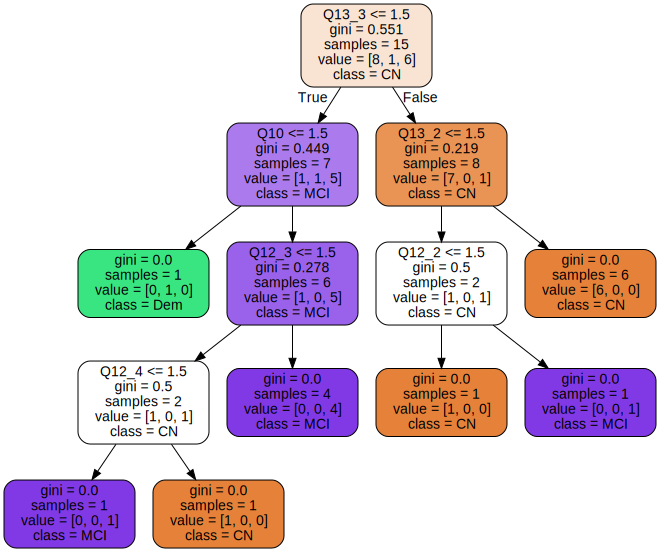

In [12]:
get_graph(clf)

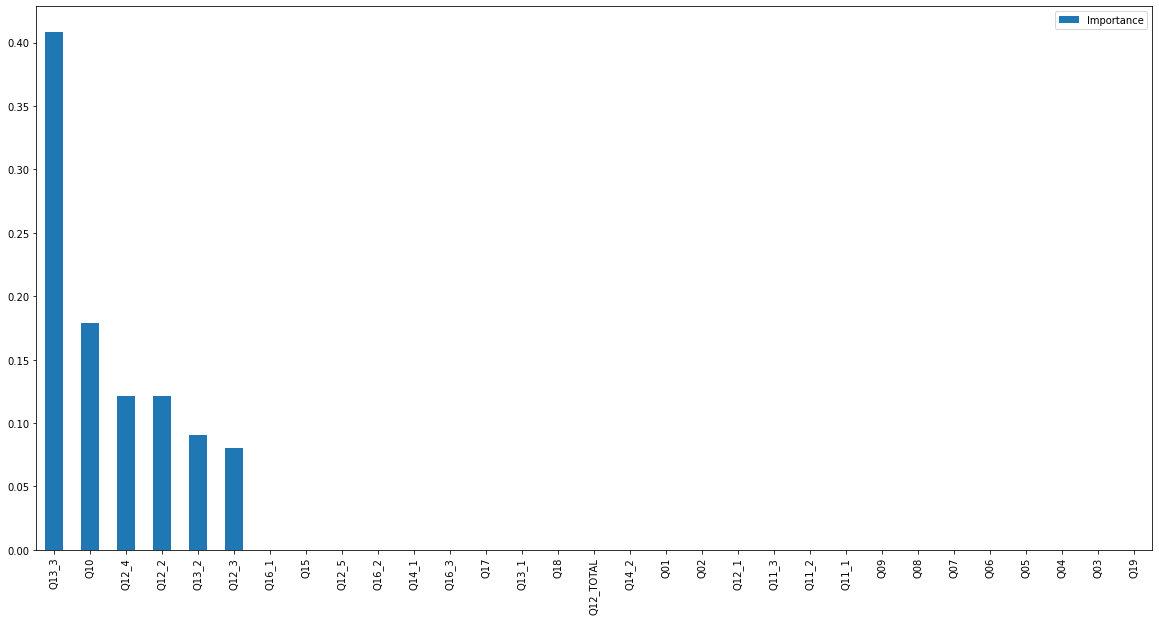

In [13]:
plot_feature_importance(clf)

In [14]:
get_feature_importance_table(clf)

,Importance,desc
Q13_3,0.408122,좀 전에 제가 외우고 계시라고 했던 물건 이름 세 가지 기억나세요? (소나무)
Q10,0.178571,여기에서는 어떤 일을 하나요?
Q12_4,0.120968,거기에서 7을 빼면 얼마가 됩니까?
Q12_2,0.120968,거기에서 7을 빼면 얼마가 됩니까?
Q13_2,0.090726,좀 전에 제가 외우고 계시라고 했던 물건 이름 세 가지 기억나세요? (연필)
Q12_3,0.080645,거기에서 7을 빼면 얼마가 됩니까?
Q16_1,0.000000,종이 뒤집기
Q15,0.000000,이번에는 제가 하는 말을 그대로 따라서 말씀하시면 됩니다.(백문이 불여일견)
Q12_5,0.000000,거기에서 7을 빼면 얼마가 됩니까?
Q16_2,0.000000,종이 반으로 접기
